# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
996,6150,7603,807,2000,2000_Pres-G_AL,AL,Pres-G,Pres-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,11/3/00,625.0,Al Gore,222,DEM,38.0,George W. Bush,241,REP,55.0,NaN,-17.0,11/7/00,41.57,56.48,-14.92,-2.08,1.0,NaN
10227,72308,135648,6254,2020,2020_Pres-G_TX,TX,Pres-G,Pres-G,Swayable,543,Online,NaN,10/25/20,552.0,Joseph R. Biden Jr.,13256,DEM,47.5,Donald Trump,13254,REP,48.6,3.0,-1.1,11/3/20,46.48,52.06,-5.58,4.48,1.0,NaN
4122,16772,21686,753,2008,2008_Pres-G_WV,WV,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/20/08,500.0,Barack Obama,41,DEM,43.0,John McCain,44,REP,52.0,NaN,-9.0,11/4/08,42.59,55.71,-13.12,4.12,1.0,NaN
8737,48873,76527,78,2016,2016_Sen-G_IN,IN,Sen-G,Sen-G,SurveyMonkey,324,Online,NaN,11/4/16,1700.0,Evan Bayh,10238,DEM,42.0,Todd C. Young,10175,REP,53.0,NaN,-11.0,11/8/16,42.41,52.11,-9.70,-1.30,1.0,NaN
9554,62475,112040,6207,2019,2019_Gov-G_MS,MS,Gov-G,Gov-G,SurveyMonkey,324,Online,NaN,10/15/19,1002.0,Jim Hood,13274,DEM,40.0,Tate Reeves,13275,REP,47.0,7.0,-7.0,11/5/19,46.83,51.91,-5.09,-1.91,1.0,for NBC News; among registered voters


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [167]:
df[df.pollster == "Siena College/The New York Times Upshot"].type_detail.value_counts()

House-G    44
Pres-G     17
Sen-G      13
Gov-G       6
Pres-D      1
Sen-OS      1
Sen-GS      1
Name: type_detail, dtype: int64

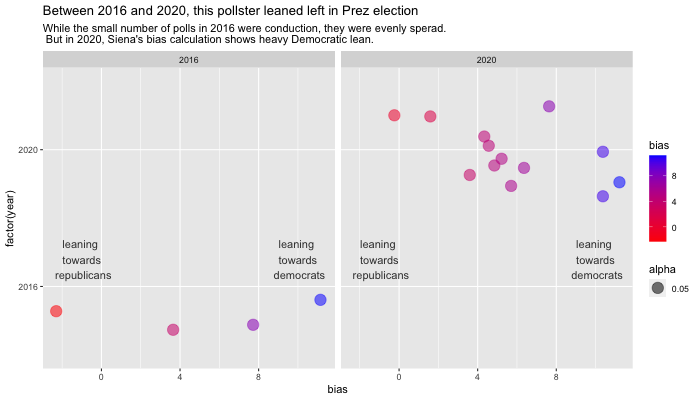

In [66]:
%%R -w 700 -h 400

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='Pres-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias,y=factor(year), alpha=0.05, color=bias) +
    geom_jitter(cex=5) + facet_wrap(~year) + scale_color_gradient(low="red", high="blue") + annotate("text", label="leaning \n towards \n republicans", x=-1, y=1.2, colour="black", alpha=0.8) + 
    annotate("text", label="leaning \n towards \n democrats", x=10, y=1.2, colour="black", alpha=0.8) + labs(title="Between 2016 and 2020, this pollster leaned left in Prez election", subtitle="While the small number of polls in 2016 were conduction, they were evenly sperad.\n But in 2020, Siena's bias calculation shows heavy Democratic lean.")

1. Between 2016 and 2020, Siena College/The New York Times Upshot held multiple polls. However, their bias towards democrats showed clearly in 2020 whereas their polls in 2016 were more evenly divided.
2. In one of the 2020 polls, they were close to being accurate on the General Presidential elections.

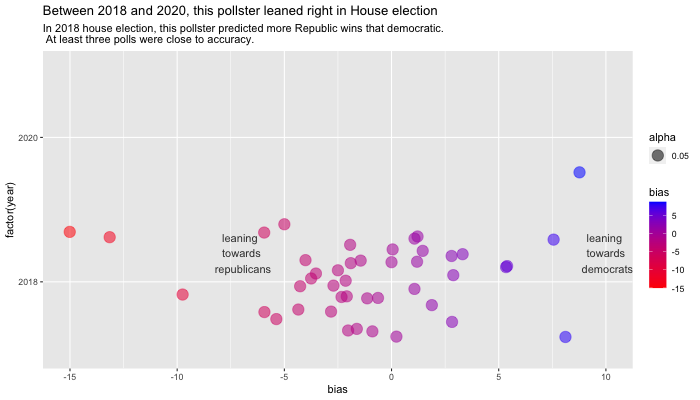

In [169]:
%%R -w 700 -h 400

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='House-G') # Filter data to polls in presidential general elections only

ggplot(df_siena) +
    aes(x=bias,y=factor(year), size=bias, alpha=0.05, color=bias) +
    geom_jitter(cex=5) + scale_color_gradient(low="red", high="blue") + annotate("text", label="leaning \n towards \n republicans", x=-7, y=1.2, colour="black", alpha=0.8) + 
    annotate("text", label="leaning \n towards \n democrats", x=10, y=1.2, colour="black", alpha=0.8) + labs(title="Between 2018 and 2020, this pollster leaned right in House election", subtitle="In 2018 house election, this pollster predicted more Republic wins that democratic.\n At least three polls were close to accuracy.")

👉 **Jayhawk Consulting**

In [18]:
df[df.pollster == "Jayhawk Consulting Services"]

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice


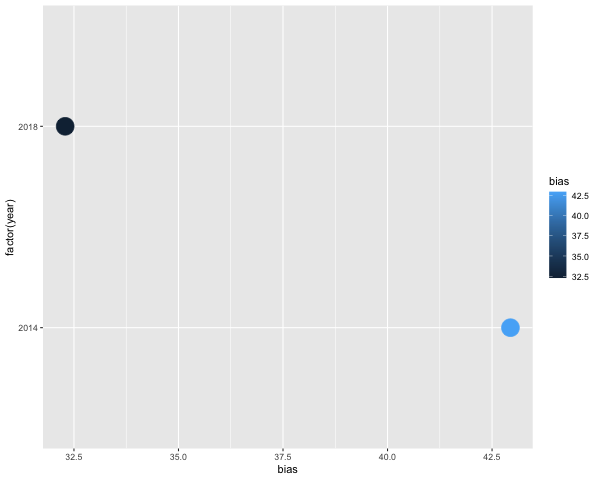

In [166]:
%%R -w 600

df_jay <- df %>% 
    filter(pollster=='Jayhawk Consulting Services') # Filter data

ggplot(df_jay) +
    aes(x=bias,y=factor(year), color=bias) +
    geom_point(size=8)

1. In the two House general elections that Jayhawk Consultancy conducted polls in, they had a radical shift from heavily leaning towards Democrats in 2014 to slightly leaning towards Republicans in 2018. However, it seems like they were inaccurate by a considerable margin for favoring the Democrats on both instances.

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [33]:
df[df.pollster == "Fox News/Beacon Research/Shaw & Co. Research"].type_simple.value_counts()

Pres-P     14
Pres-G     12
Sen-G      10
Gov-G       6
House-G     4
Name: type_simple, dtype: int64

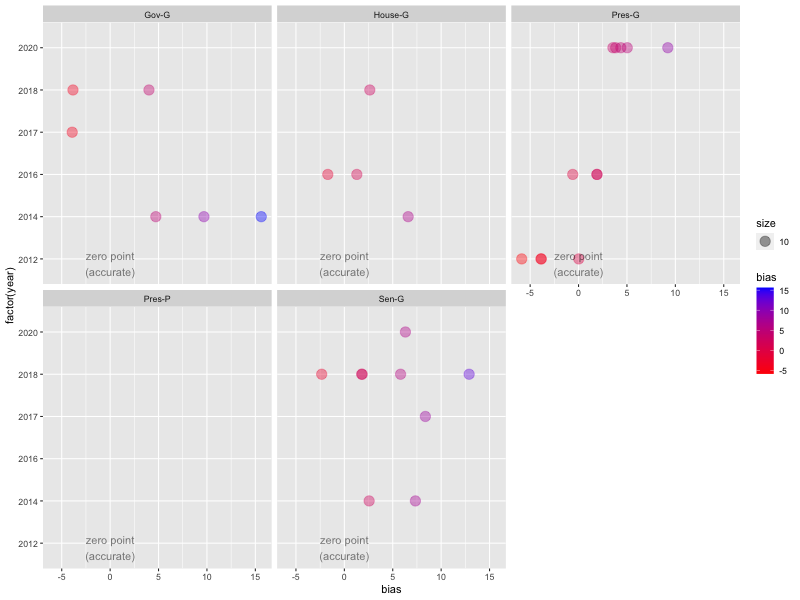

In [72]:
%%R -w 800 -h 600

df_fox <- df %>% 
    filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research') # Filter data

ggplot(df_fox) +
    aes(x=bias, y=factor(year), size=10, color=bias) + scale_color_gradient(low="red", high="blue") +
    geom_point(alpha=0.4) + facet_wrap(~type_simple) + annotate("text", label="zero point\n(accurate)", x=0, y=0.9, color="black", alpha=0.5)

1. In the presidential general election cycles over the year, the bias has shifted from heavily favoring republican candidates (negative/red values) in 2012 and 2016 to slightly favoring democratic candidates (positive/blue-er values).
2. I chose to do a facet wrap, instead of filtering the election type, because they have done multiple types of elections.

👉 **Brown University**

In [73]:
df[df.pollster == "Brown University"].type_simple.value_counts()

Pres-P     5
Gov-G      3
Sen-G      2
Pres-G     1
House-G    1
Name: type_simple, dtype: int64

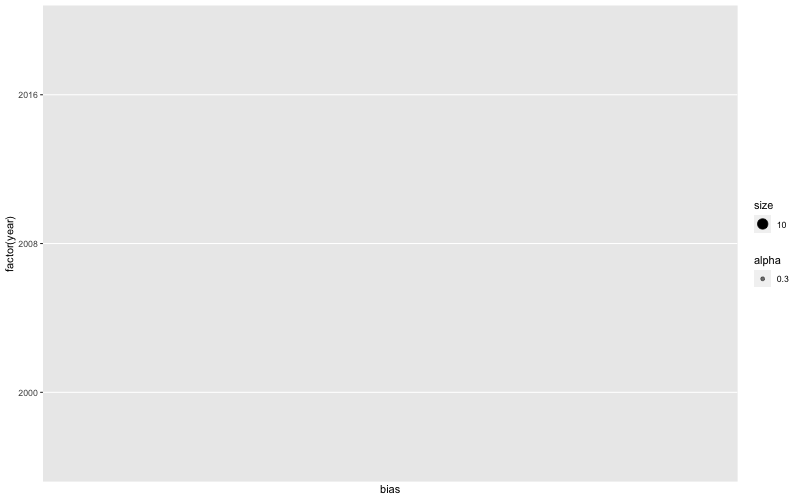

In [115]:
%%R -w 800 -h 500

df_brown <- df %>% 
    filter(pollster=='Brown University', type_simple=='Pres-P') # Filter data

ggplot(df_brown) +
    aes(x=bias, y=factor(year), size=10, alpha=0.3) + 
    geom_point()

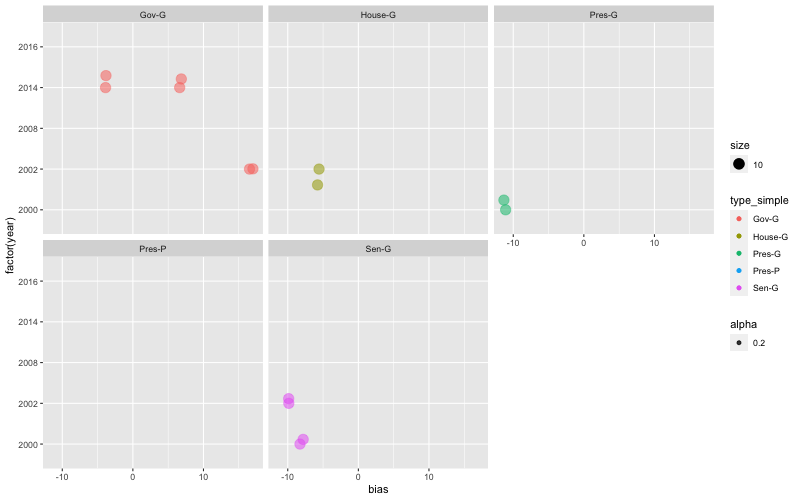

In [119]:
%%R -w 800 -h 500

df_brown <- df %>% 
    filter(pollster=='Brown University') # Filter data

ggplot(df_brown) +
    aes(x=bias, y=factor(year), size=10, color=type_simple, alpha=0.2) + 
    geom_point() + geom_jitter() + facet_wrap(~type_simple)

1. They are clearly biased towards republicans in the presidential as well as house and senator general elections. They are off by several points from accuracy. The pollster data after 2014 is not in the dataset.

QUESTION: Even though value_counts of type_simple show that Brown did 5 Pres-P election cycles, the plot does not show any dots.

👉 **American Research Group**

In [120]:
df[df.pollster == "American Research Group"].type_simple.value_counts()

Pres-P     190
Pres-G      54
Sen-G       13
Gov-G       10
House-G     10
Name: type_simple, dtype: int64

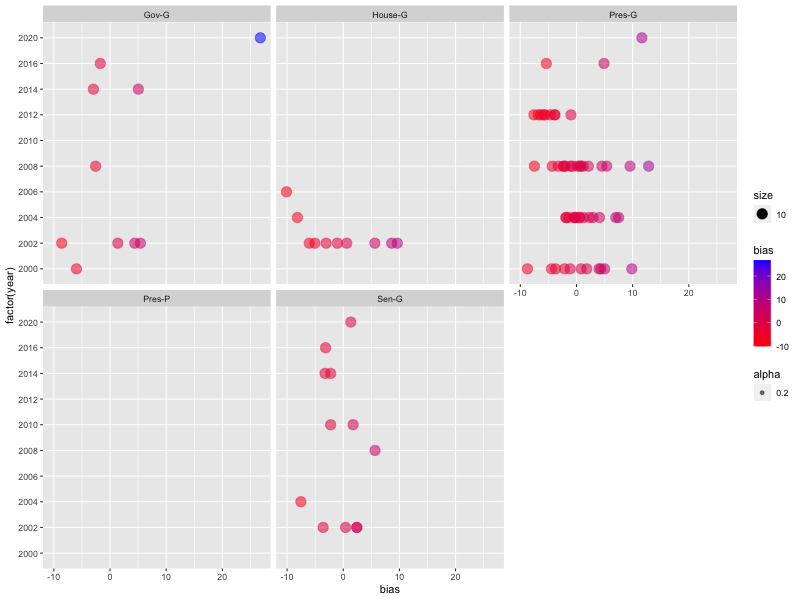

In [127]:
%%R -w 800 -h 600

df_arg <- df %>% 
    filter(pollster=='American Research Group') # Filter data

ggplot(df_arg) +
    aes(x=bias, y=factor(year), size=10, color=bias, alpha=0.2) + 
    scale_color_gradient(low="red", high="blue") + 
    geom_point() + facet_wrap(~type_simple)

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


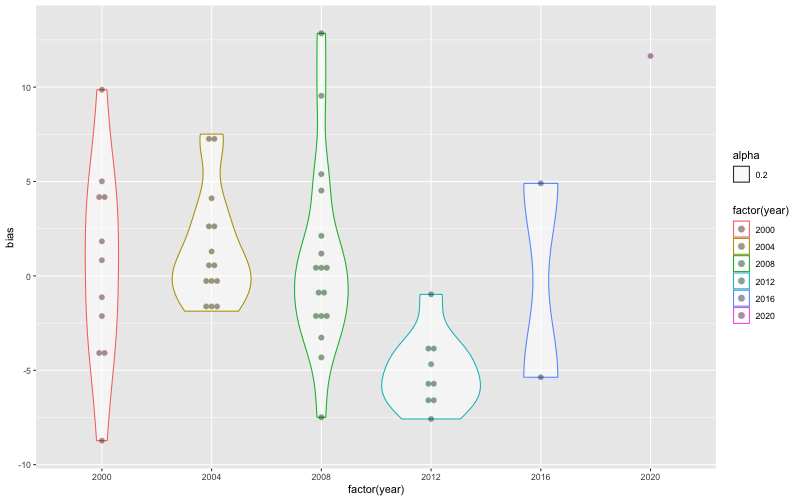

In [165]:
%%R -w 800 -h 500

df_arg <- df %>% 
    filter(pollster=='American Research Group', type_simple=='Pres-G') # Filter data

ggplot(df_arg) +
    aes(x=factor(year), y=bias, alpha=0.2, color=factor(year)) + 
    geom_violin() + geom_dotplot(binaxis="y", stackdir = "center", dotsize=0.4, alpha=0.4)

1. It is clear from the bulge of the yearly violins that their bias is mostly towards republicans. However, they also have had multiple polls during 2004 and 2008 race when they were close to zero i.e., had more accuracy.(I tried the dotplot to guage the number of polls that a closer to zero but it is not helping much mostly because I'm not able to make sense of it.)

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [ ]:
American Research Group

👉 Which are the least accurate?

In [ ]:
Brown University

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
